In [1]:
# This script is for RF, all variables
# Take Dataset3 NYC for example

In [2]:
# Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_complete_test_passed = pd.read_csv("../Data/01 Processed Dataset/Complete_NYC.csv") #input
X_complete_test_passed1 = X_complete_test_passed.set_index('GEOID')
y = X_complete_test_passed1.pop('obesity_cr')

In [4]:
X_complete_test_passed1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36081046200,0.128637,0.001426,0.405733,0.000000,0.324729,0.429122,0.443847,0.207074,0.149173,0.097119,...,0.056929,0.086140,0.167808,566100,1964,0.776419,28106.912090,0.637197,0.257692,0.590230
36081045000,0.078431,0.000000,0.579115,0.000000,0.191518,0.447788,0.534483,0.176015,0.133151,0.176471,...,0.077815,0.071591,0.076923,585500,1939,0.326454,12744.813160,0.721141,0.374830,0.778180
36081045400,0.160195,0.008653,0.628800,0.000000,0.101176,0.526514,0.550474,0.151986,0.135123,0.197471,...,0.064898,0.147992,0.089735,168400,1954,0.558124,19521.893370,0.421530,0.228491,0.649373
36081045600,0.028744,0.000000,0.708775,0.000000,0.142209,0.486384,0.604982,0.216339,0.116490,0.087746,...,0.081081,0.170197,0.201201,650900,1939,0.279279,8153.246497,0.096508,0.143136,0.324875
36081044602,0.197928,0.011224,0.427585,0.016836,0.298295,0.462335,0.505800,0.136844,0.189294,0.108353,...,0.089128,0.325225,0.340757,281000,1957,0.869339,27255.666740,0.555596,0.268350,0.474746


In [5]:
len(y),len(X_complete_test_passed1.columns)

(1995, 24)

In [6]:
y.head()

GEOID
36081046200    26.6
36081045000    19.6
36081045400    21.5
36081045600    18.6
36081044602    30.6
Name: obesity_cr, dtype: float64

In [7]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [8]:
# feature importance table
df_complete_feaimp = pd.DataFrame({'feature':X_complete_test_passed1.columns}).set_index('feature')

In [9]:
y_rf_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(X_complete_test_passed1):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = X_complete_test_passed1.iloc[train_index], X_complete_test_passed1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    rf = RandomForestRegressor(bootstrap=False, n_estimators=560, max_features=7, random_state=42) # input
    rf.fit(scaled_X_train, y_train)
    
    ## record feature importance
    df_complete_feaimp['fold_'+str(fold_index)] = rf.feature_importances_
    ## finish recording feature importance

    this_y_predict = rf.predict(scaled_X_test).flatten()

    y_rf_complete_predict = y_rf_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [  29   49   56   65   69   70   99  109  111  120  124  128  135  211
  212  231  233  237  239  251  254  256  270  281  298  305  306  307
  316  324  342  344  350  353  361  366  367  368  382  383  394  411
  414  416  420  422  427  429  433  450  464  480  483  485  486  514
  526  527  530  532  548  552  554  561  570  581  582  583  602  614
  617  630  679  741  743  752  756  759  785  798  819  824  843  849
  881  889  892  903  915  921  926  930  932  940  949  950  988  999
 1001 1009 1052 1087 1106 1113 1116 1118 1125 1137 1160 1169 1176 1177
 1182 1216 1221 1234 1235 1242 1244 1252 1255 1268 1270 1273 1274 1284
 1285 1287 1298 1303 1305 1316 1318 1322 1341 1343 1344 1357 1359 1379
 1384 1386 1412 1428 1429 1444 1448 1469 1476 1490 1497 1506 1531 1532
 1563 1573 1593 1594 1600 1604 1616 1619 1647 1659 1668 1671 1673 1675
 1681 1684 1686 1716 1720 1726 1732 1736 1740 1758 1764 1770 1784 1810
 1813 1814 1820 1855 1856 1867 1907 1918 1926 1934 1935 1936 1940 1952


TEST: [  13   14   20   21   34   40   64   87   91   95   98  121  130  134
  161  166  187  189  200  201  205  206  216  230  241  252  269  276
  288  295  315  330  337  343  378  379  385  387  391  392  397  401
  406  418  455  459  466  474  484  492  502  508  510  520  562  563
  564  565  592  600  612  642  646  647  683  686  699  702  719  725
  729  742  747  748  763  766  769  775  776  779  791  794  804  805
  815  831  840  856  860  863  870  871  878  891  897  929  955  957
  960  975  995 1016 1017 1020 1021 1025 1028 1038 1044 1051 1056 1064
 1071 1076 1082 1086 1095 1104 1123 1126 1129 1130 1152 1154 1162 1180
 1184 1215 1238 1241 1264 1267 1275 1294 1297 1332 1337 1363 1367 1369
 1390 1396 1411 1413 1430 1437 1451 1459 1478 1482 1484 1485 1495 1499
 1500 1508 1513 1515 1522 1528 1570 1577 1579 1584 1585 1590 1597 1598
 1638 1685 1687 1698 1705 1714 1724 1725 1748 1750 1751 1757 1762 1772
 1792 1795 1796 1806 1836 1842 1845 1846 1862 1865 1886 1890 1895 1899


In [10]:
rf_complete_rmse = mean_squared_error(y_true , y_rf_complete_predict, squared=False)
rf_complete_r2 = r2_score(y_true, y_rf_complete_predict)
avg_r_squared = avg_r_squared/10

In [11]:
print("RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_rmse))
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_r2)) # For R2, I took this one.
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): "+str(avg_r_squared))

RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: 1.8805182705854182
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: 0.8979054558766851
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): 0.8964791782378253


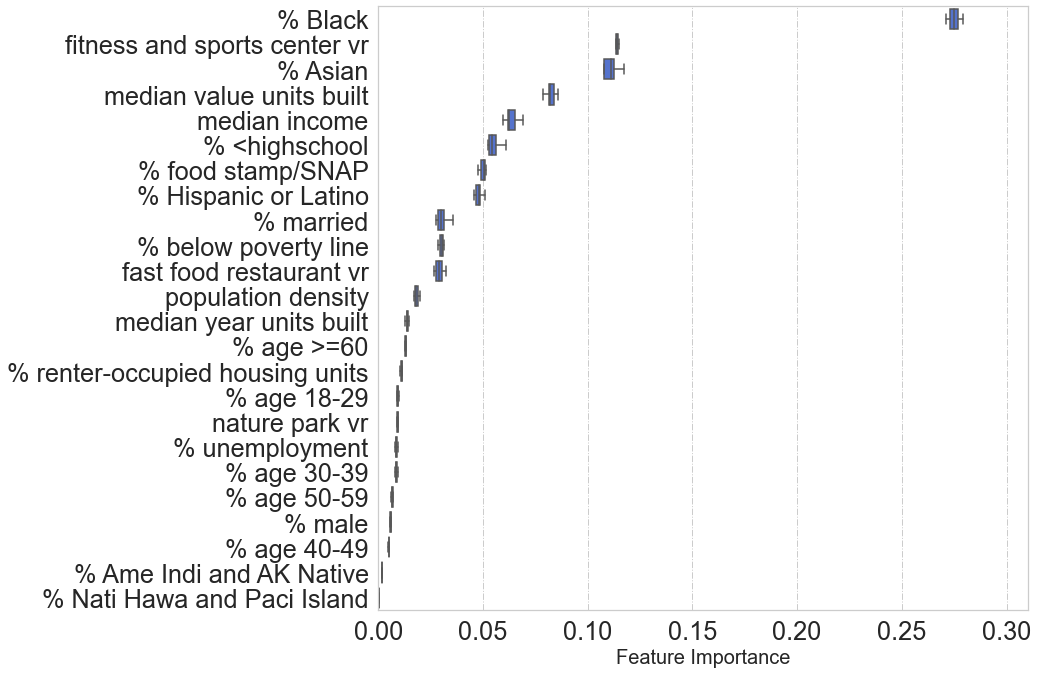

In [12]:
# Feature importance Sns visualization (boxplot, I will not use this one, I will use below one)
df_complete_feaimp = df_complete_feaimp.rename(index={'fitness':'fitness and sports center vr', 'park':'nature park vr', 'fafood':'fast food restaurant vr'}) 

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid",font_scale = 2.3)

df_complete_feaimp_box = df_complete_feaimp.T
index_sort = df_complete_feaimp_box.mean().sort_values(ascending=False).index
df_complete_feaimp_box = df_complete_feaimp_box[index_sort]

ax = sns.boxplot(data=df_complete_feaimp_box, orient='h', showfliers = False, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()

# plt.savefig("../boxplot_featureimportance_NYC.png",dpi=300) # input

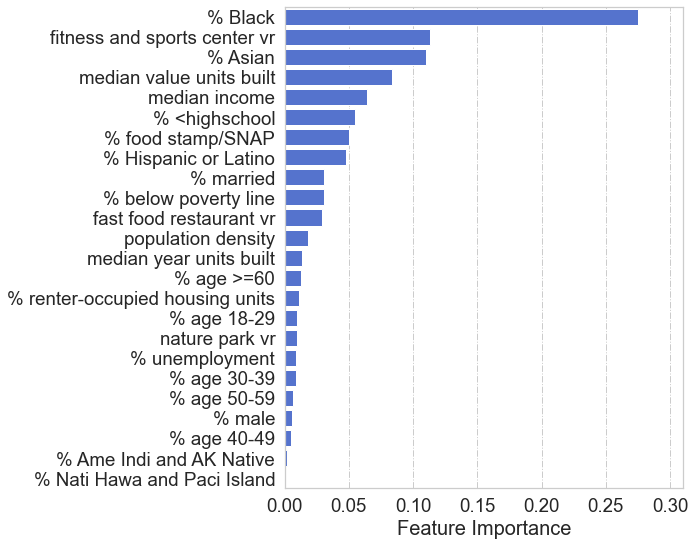

In [15]:
# Feature importance bar visualization (bar plot, this one I use)
df_complete_feaimp["mean"] = df_complete_feaimp.mean(axis = 1)
df_complete_feaimp1 = df_complete_feaimp.reset_index()
df_complete_feaimp2 = df_complete_feaimp1.sort_values(by = "mean", ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="feature", x="mean", data=df_complete_feaimp2, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/11 RF Important Figure/bar_feature_importance_NYC.png",dpi=300)

11.0
43.4
14.175892857142788
38.49482142857153


<Figure size 720x576 with 0 Axes>

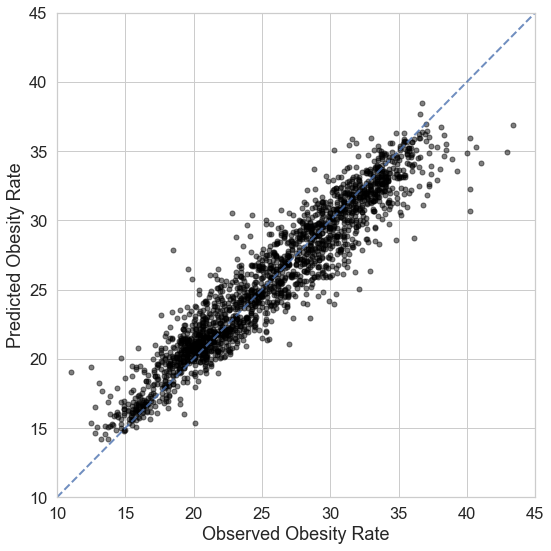

In [14]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_complete_predict))
print(np.max(y_rf_complete_predict))

#scatter plot
lims = [10, 45]
prediction_scatter(y_true, y_rf_complete_predict, lims, "")
plt.tight_layout()
# plt.savefig("../RF_pred_origin_NYC.png",dpi=300)